![HERE](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUolCmySFuP3kJnmkPvN58SBKttzm434yP6Q&usqp=CAU)
<h1><center>Introduction</center></h1>
Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Dipinder Goyal, Pankaj Chadah and Junian Patidar in 2008

#### Columns description

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

In [1]:
!pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objs as go
from plotly.offline import iplot

### read dataset

In [3]:
df=pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
len(df['name'].unique())

8792

In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### geting the all NAN features

In [8]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

### of missing values

In [9]:
#% of missing values
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


* This is percentage for columns have massing value we found ( rate have 15.0337%) and phone have2.3358% missing values and location have 0.0406% now we know the big missing value in columns (rate)

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

* now we can clean the rate columns from the missing value.

In [11]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [12]:
df.shape

(43942, 17)

* def function to remove (/) from rate 

In [13]:
def split(x):
    return x.split('/')[0]

In [14]:
df['rate']=df['rate'].apply(split)

In [15]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

* the rate is clrean


* now we go to remove (NEW)

In [17]:
df.replace('NEW',0,inplace=True)

In [18]:
df.replace('-',0,inplace=True)

In [19]:
df.replace('-',0,inplace=True)

In [20]:
df['rate']=df['rate'].astype(float)

* Now let's see this

In [21]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

* very good it's very clean know.
 

### calculate avg rating of each resturant

In [22]:
df.groupby('name')['rate'].mean()

name
#FeelTheROLL                                    3.400000
#L-81 Cafe                                      3.900000
#refuel                                         3.700000
1000 B.C                                        3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            3.700000
                                                  ...   
i-Bar - The Park Bangalore                      3.800000
iFruit Live Ice Creams                          3.400000
iSpice Resto Cafe                               3.700000
nu.tree                                         4.314286
re:cess - Hilton Bangalore Embassy GolfLinks    4.100000
Name: rate, Length: 7162, dtype: float64

* we can plot this number to understand more

<AxesSubplot:xlabel='name'>

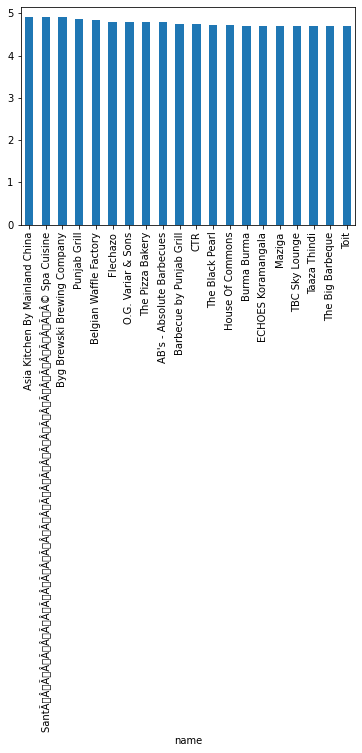

In [23]:
df.groupby('name')['rate'].mean().nlargest(20).plot.bar()

* here we change the name of columns from(name , rate) to (restorant and rating)

In [24]:
df_rate=df.groupby('name')['rate'].mean().to_frame()
df_rate=df_rate.reset_index()
df_rate.columns=['restaurant','rating']
df_rate.head(10)

,restaurant,rating
0,#FeelTheROLL,3.400
1,#L-81 Cafe,3.900
2,#refuel,3.700
3,1000 B.C,3.200
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700
5,11 to 11 Express Biriyanis,3.500
6,1131 Bar + Kitchen,4.500
7,12th Main - Grand Mercure,4.100
8,1441 Pizzeria,4.100
9,1522 - The Pub,4.212


In [25]:
df_rate.shape

(7162, 2)

### Calc the rating distribution

<AxesSubplot:xlabel='rating', ylabel='Density'>

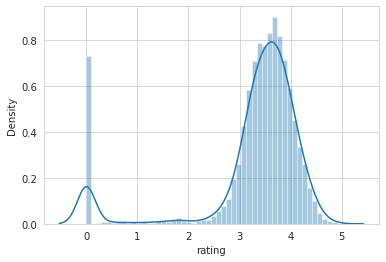

In [26]:
sns.set_style(style='whitegrid')
sns.distplot(df_rate['rating'])

*  Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

#### Which are the top restaurant chains in Bangaluru?

Text(0.5, 0, 'Number of outlets')

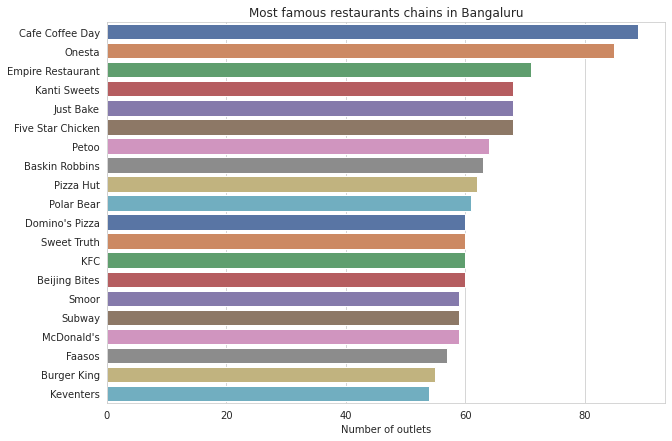

In [27]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

* now we can how many rest do not accept online order

([<matplotlib.patches.Wedge at 0x7f7528412a50>,
 [Text(-0.481488774517003, 0.9890240442042423, ''),
  Text(0.5252605823084886, -1.0789352717716423, '')],
 [Text(-0.26263024064563795, 0.5394676604750411, '64.4%'),
  Text(0.30640200634661835, -0.629378908533458, '35.6%')])

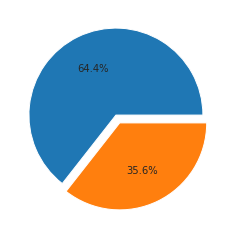

In [28]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

* we can  using plotly to How many of the restuarants do not accept online orders?

In [29]:
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [30]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

* Wow the big prsentage accept look on chart will see 64.4% accept is good

* here will know,  What is the ratio b/w restaurants that provide and do not provide table booking ?

([<matplotlib.patches.Wedge at 0x7f751ac51990>,
 [Text(-0.9856961240827233, 0.4882654513359477, ''),
  Text(1.0753048626356982, -0.5326532196392153, '')],
 [Text(-0.537652431317849, 0.26632660981960776, '85.4%'),
  Text(0.6272611698708239, -0.31071437812287556, '14.6%')])

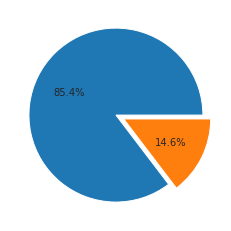

In [31]:
x=df['book_table'].value_counts()
labels=['not book','book']
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')

In [32]:
x=df['book_table'].value_counts()
labels=['not book','book']

In [33]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

In [34]:
iplot([trace])

#### How many types of restaurants we have?

In [35]:
df['rest_type'].isna().sum()

151

In [36]:
df['rest_type'].dropna(inplace=True)

In [37]:
df['rest_type'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: rest_type, Length: 43942, dtype: bool

In [38]:
len(df['rest_type'].unique())

88

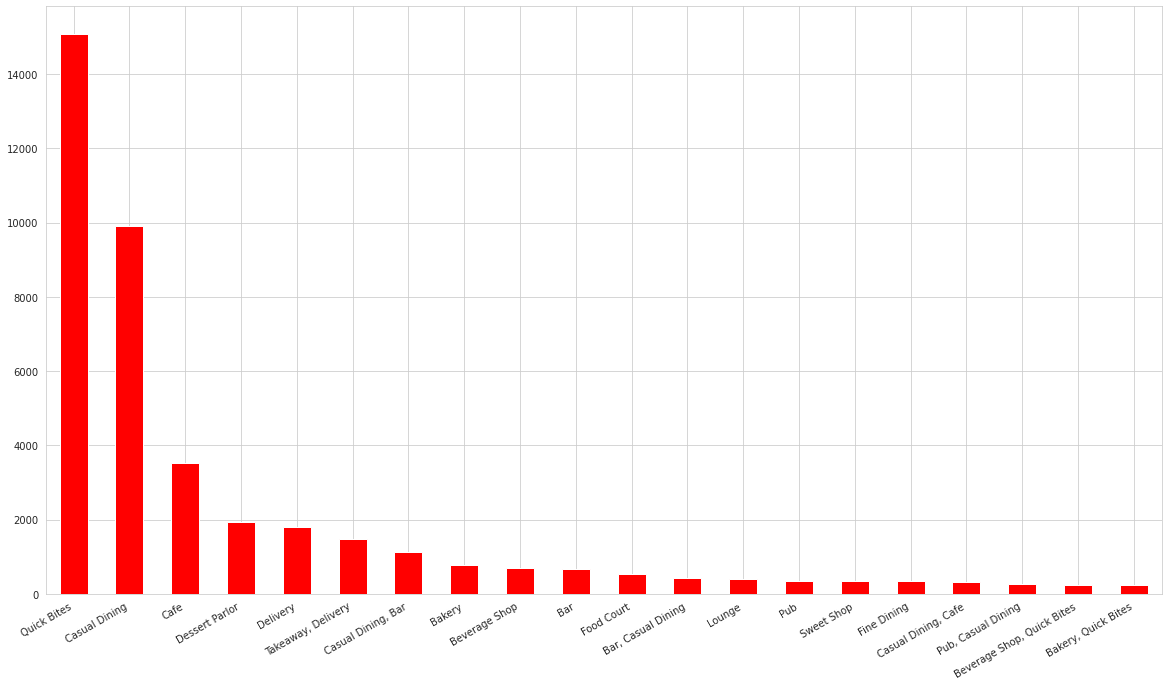

In [39]:
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

* Know we using I love using ploty. ploty showing more information about data

In [40]:
trace1 = go.Bar( 
        x = df['rest_type'].value_counts().nlargest(20).index,
        y = df['rest_type'].value_counts().nlargest(20),
        name= 'rest_type')
iplot([trace1])

### Now we can know what is highest voted restaurant

<AxesSubplot:xlabel='name'>

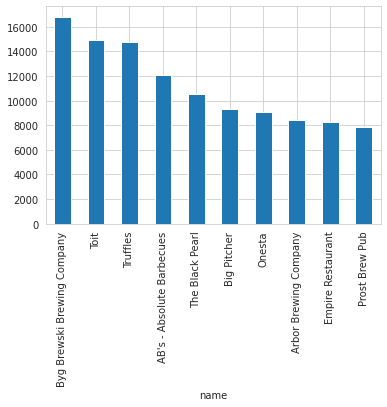

In [41]:
df.groupby('name')['votes'].max().nlargest(10).plot.bar()

In [42]:
trace1 = go.Bar( 
        x = df.groupby('name')['votes'].max().nlargest(10).index,
        y = df.groupby('name')['votes'].max().nlargest(10),
        name= 'name')
iplot([trace1])

* we see the most vote for (By Brewski Company)

### total restaurants at different locations of Bengalore

In [43]:
df.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [44]:
restaurant=[]
location=[]
for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))


In [45]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


<AxesSubplot:xlabel='location'>

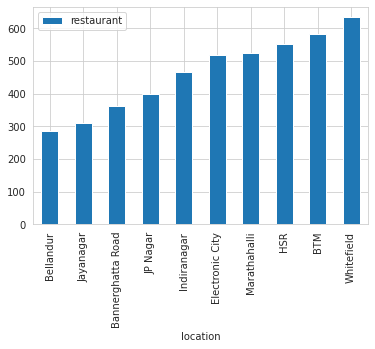

In [46]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()


In [47]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Bellandur', 'Jayanagar', 'Bannerghatta Road', 'JP Nagar',
       'Indiranagar', 'Electronic City', 'Marathahalli', 'HSR', 'BTM',
       'Whitefield'],
      dtype='object', name='location')

In [48]:
trace1 = go.Bar( 
        x = df_total['restaurant'].nlargest(10).index,
        y = df_total['restaurant'].nlargest(10),
        name= 'Priority')

In [49]:
iplot([trace1])

### geographical analysis
*  I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [50]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [51]:
locations['new_Name']='Bangalore '+locations['Name']

In [52]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [53]:
!pip install geopy

In [54]:
from geopy.geocoders import Nominatim

In [55]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [56]:
locations['geo_loc']=lat_lon

In [57]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.3872141, 76.6669626)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


##### We have found out latitude and longitude of each location listed in the dataset using geopy.
##### This is used to plot maps.

In [58]:
locations.to_csv('zomato_locations.csv',index=False)

In [59]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [60]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

,Name,count
0,BTM,4261
1,Koramangala 5th Block,2381
2,HSR,2128
3,Indiranagar,1936
4,JP Nagar,1849


In [61]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

,Name,count,new_Name,geo_loc
0,BTM,4261,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2381,Bangalore Koramangala 5th Block,"(12.9343774, 77.628415)"
2,HSR,2128,Bangalore HSR,"(18.1475, 41.538889)"
3,Indiranagar,1936,Bangalore Indiranagar,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)"


In [62]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [63]:
len(Restaurant_locations['geo_loc'])

91

In [64]:
Restaurant_locations.isna().sum()

Name        0
count       0
new_Name    0
geo_loc     0
dtype: int64

In [65]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.9059707, 77.6017374), (12.9400321, 77.6203272),
       (12.9302645, 77.6332585), (44.621621, -84.790422),
       (12.93577245, 77.66676103753434), (14.5395813, 121.070371),
       (32.2934563, -64.78236307254568), (12.9252241, 77.6367015),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (17.1452094, 79.6218777), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (40.575894, -74.1251342), (12.9417261, 77.5755021),
       (-28.5477541, 29.788093), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7133336, -74.0092085),
       (13.0093455, 77.6377094), (13.0170347, 77.5726006),
       (13.0141618, 77.6518539), (40.7652844, -76.373824),
       (12.9882338

In [66]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [67]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [68]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[45.95485055, -112.49659530324134, 4261.0],
 [12.9343774, 77.628415, 2381.0],
 [18.1475, 41.538889, 2128.0],
 [12.9732913, 77.6404672, 1936.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.64392675, 83.05280519687284, 1718.0],
 [44.3730577, -71.6118577, 1693.0],
 [12.9552572, 77.6984163, 1503.0],
 [12.9059707, 77.6017374, 1324.0],
 [12.9400321, 77.6203272, 1111.0],
 [12.9302645, 77.6332585, 1089.0],
 [44.621621, -84.790422, 1084.0],
 [12.93577245, 77.66676103753434, 1078.0],
 [14.5395813, 121.070371, 965.0],
 [32.2934563, -64.78236307254568, 964.0],
 [12.9252241, 77.6367015, 919.0],
 [12.9778793, 77.6246697, 901.0],
 [12.93433385, 77.63040639553275, 864.0],
 [17.1452094, 79.6218777, 836.0],
 [15.8876779, 75.7046777, 805.0],
 [13.0221416, 77.6403368, 748.0],
 [13.0027353, 77.5703253, 658.0],
 [40.575894, -74.1251342, 634.0],
 [12.9417261, 77.5755021, 628.0],
 [-28.5477541, 29.788093, 608.0],
 [33.5935063, -79.0345627, 581.0],
 [12.996845, 77.6130165, 578.0],
 [40.7133336, -74.0092085, 550.0

In [69]:
import folium
from folium.plugins import HeatMap
#basemap=generateBaseMap()

In [70]:
df2= df[df['cuisines']=='North Indian']
df2.head()



,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [71]:
df3= df[df['cuisines']=='South Indian']
south_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
south_india.columns=['Name','count']
south_india=south_india.merge(locations,on="Name",how='left').dropna()
south_india['lan'],south_india['lon']=zip(*south_india['geo_loc'].values)

In [72]:
south_india=south_india.drop(['geo_loc'],axis=1)

In [73]:
south_india.head()

,Name,count,new_Name,lan,lon
0,BTM,274,Bangalore BTM,45.954851,-112.496595
1,Banashankari,35,Bangalore Banashankari,15.887678,75.704678
2,Banaswadi,9,Bangalore Banaswadi,13.014162,77.651854
3,Bannerghatta Road,60,Bangalore Bannerghatta Road,12.905971,77.601737
4,Basavanagudi,17,Bangalore Basavanagudi,12.941726,77.575502


### Total number of variety of restaurants ie north indian,south Indian

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

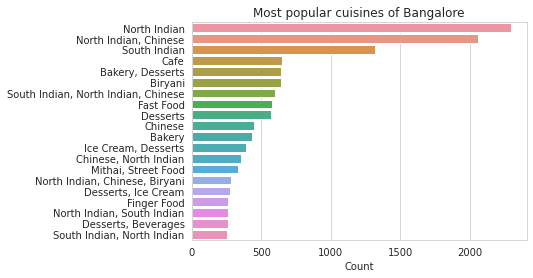

In [74]:

cuisines=df['cuisines'].value_counts()[:20]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [75]:
cuisines=df['cuisines'].value_counts()[:10]
trace1 = go.Bar( 
        x = cuisines.index,
        y = cuisines,
        name= 'Cuisines')
iplot([trace1])

* We can observe that North Indian,chinese,South Indian and Biriyani are most common.
* It means Bengalore is more influenced by North Indian culture more than South

### Now we Anlyse Approx cost for 2 people

In [76]:
df['approx_cost(for two people)'].value_counts()

300      5735
400      5562
500      4326
200      3527
600      3365
         ... 
5,000       1
3,700       1
360         1
560         1
160         1
Name: approx_cost(for two people), Length: 66, dtype: int64

In [77]:
len(df['approx_cost(for two people)'].value_counts())

66

In [78]:
df['approx_cost(for two people)'].isna().sum()

252

In [79]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [80]:
df['approx_cost(for two people)'].isna().sum()

0

* Now columns is clean

In [81]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [82]:
def is_float(x):
    try:
        float(x)
    except :
        return False 
    return True

In [83]:
df[~df['approx_cost(for two people)'].apply(is_float)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
67,https://www.zomato.com/gustoesbeerhouse?contex...,"10, 30th Main, Deve Gowda Petrol Bunk Road, 3r...",Gustoes Beer House,No,No,4.1,868,080 49653521,Banashankari,Pub,"Beer, Wedges, Pizza, Nachos, Salads, Papaya Sa...","Continental, Italian, Mexican, North Indian, C...","1,200","[('Rated 5.0', 'RATED\n Has a really calm roo...",[],Delivery,Banashankari
119,https://www.zomato.com/bangalore/k27-the-pub-b...,"27, 27th Cross, 2nd Stage, Banashankari, Banga...",K27 - The Pub,No,No,3.1,30,+91 9980097472,Banashankari,Bar,NaN,"Chinese, North Indian","1,000","[('Rated 4.0', ""RATED\n Convenient and Averag...",[],Delivery,Banashankari
166,https://www.zomato.com/bangalore/patio-805-jay...,"805, Ground Floor, 35C Cross, 9th Main, 4th Bl...",Patio 805,Yes,Yes,4.1,364,+91 8884999805,Jayanagar,Casual Dining,"Noodles, Laksa Soup, Coffee, Veg Fritters, Veg...","Thai, Vietnamese, Asian, Chinese","1,200","[('Rated 4.0', ""RATED\n The number of good re...",[],Delivery,Banashankari
207,https://www.zomato.com/bangalore/chutney-chang...,"Cosmopolitan Club, 22nd Cross, 3rd Block, Jaya...",Chutney Chang,Yes,Yes,4.1,2339,080 22443007\r\n+91 9901967373,Jayanagar,Casual Dining,"Veg Momos, Brownie Chocolate, Palak Chaat, Mut...","North Indian, Chinese, BBQ","1,500","[('Rated 4.0', 'RATED\n Great place for team ...",[],Delivery,Banashankari
217,https://www.zomato.com/bangalore/toscano-jayan...,"359/38,Next to Fabindia, 7th Cross, 1st Block,...",Toscano,Yes,Yes,4.3,1129,080 41558423\r\n+91 7619320074,Jayanagar,Casual Dining,"Pizza, Pasta, Salads, Calamari, Ravioli, Pumpk...","Italian, Salad","1,300","[('Rated 4.0', 'RATED\n Saturday Night Dinner...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51707,https://www.zomato.com/bangalore/m-bar-bengalu...,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"2,000","[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [84]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [85]:
type(df['approx_cost(for two people)'][0])

str

* we convert str to int


In [86]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [87]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [88]:
df['approx_cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51709     800
51711     800
51712    1500
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 43690, dtype: int64

* we can now plot this columns ( **cost vs rating**)

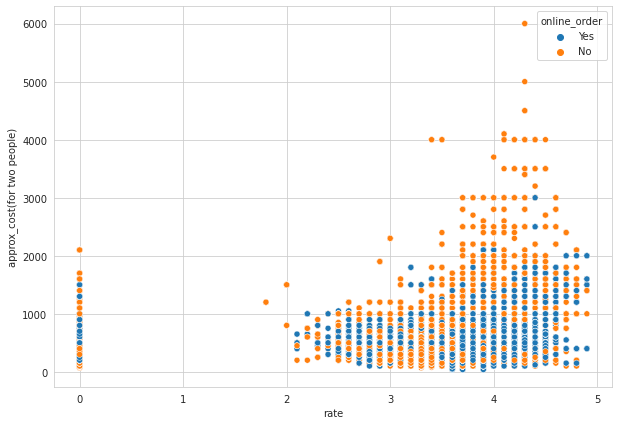

In [89]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=df)
plt.show()

##### from this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too

### Is there any difference b/w votes of restaurants accepting and not accepting online orders?

<AxesSubplot:xlabel='online_order', ylabel='votes'>

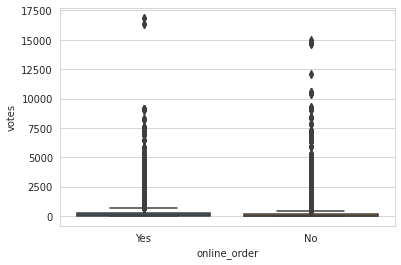

In [90]:
sns.boxplot(x='online_order',y='votes',data=df)

#### from this boxplot,we can observe that median number of votes for both categories vary.
#### Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.


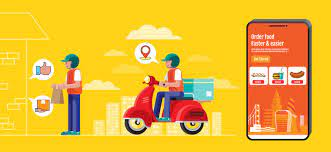
<h1><center> Online Order</center></h1>

#### Is there any difference b/w price of restaurants accepting and not accepting online orders?

<AxesSubplot:xlabel='online_order', ylabel='approx_cost(for two people)'>

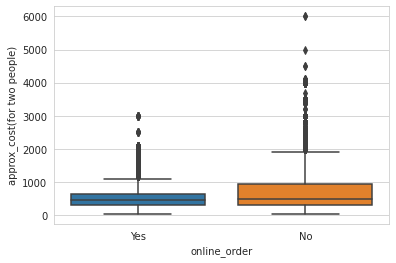

In [91]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=df)

In [92]:
fig = px.box(df,x='online_order',y='approx_cost(for two people)')
fig.show()

#### Statisticn method equal: 
* we see in (**Yes**) (min=40, median=450) and in (**No**) (min=50,median=500)
* Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders

##### distribution of cost for 2 people

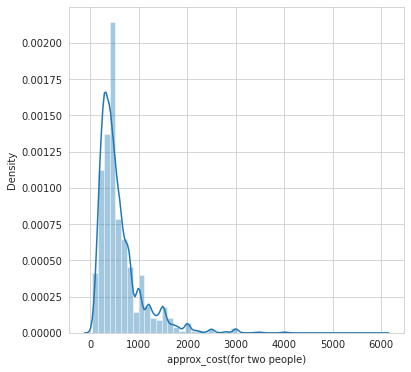

In [93]:
plt.figure(figsize=(6,6))
sns.distplot(df['approx_cost(for two people)'])
plt.show()

In [94]:
px.histogram(df, x="approx_cost(for two people)")